In [1]:
from gmm_dimension_reduction.slicing import slice_gmm
from gmm_dimension_reduction import GaussianMixtureModel
from gmm_dimension_reduction.visualization import plot_gmm, slicing_plot_matrix

In [2]:
from sklearn.datasets import load_diabetes
from sklearn import datasets

from sklearn.mixture import GaussianMixture

import numpy as np
import pandas as pd
import itertools

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
%load_ext autoreload
%autoreload 2

# Diabetes dataset

In [5]:
diabetes = datasets.load_diabetes()

In [6]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
gm_diabetes = GaussianMixture(n_components=3, random_state=0).fit(diabetes_df)

In [8]:
weights_diabetes, means_diabetes, covariances_diabetes = slice_gmm([1, 3], gm_diabetes.weights_, gm_diabetes.means_, gm_diabetes.covariances_)

In [9]:
gmm_diabetes = GaussianMixtureModel.GaussianMixtureModel(weights_diabetes, means_diabetes, covariances_diabetes)

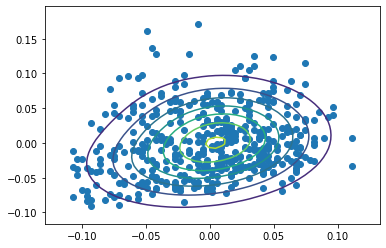

In [10]:
plot_gmm(gmm_diabetes, datapoints=diabetes_df[["age", "bmi"]])

# Iris dataset

In [11]:
iris_df = datasets.load_iris()

In [12]:
iris_df = pd.DataFrame(iris_df.data, columns=iris_df.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
gm_iris = GaussianMixture(n_components=3, random_state=0).fit(iris_df)

In [14]:
weights_iris, means_iris, covariances_iris = slice_gmm([1, 2], gm_iris.weights_, gm_iris.means_, gm_iris.covariances_)

In [15]:
gmm_iris = GaussianMixtureModel.GaussianMixtureModel(weights_iris, means_iris, covariances_iris)


In [16]:
def create_gmm_plot(ax, gm, df, features, n_components=2):
    weights_, means_, covariances_ = slice_gmm(features, gm.weights_, gm.means_, gm.covariances_)
    gmm = GaussianMixtureModel.GaussianMixtureModel(weights_, means_, covariances_)
    plot_gmm(gmm, ax=ax, datapoints=df[df.columns[[i - 1 for i in features]]])

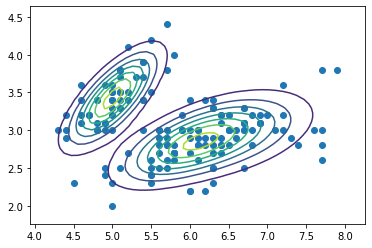

In [17]:
plot_gmm(gmm_iris, datapoints=iris_df[["sepal length (cm)", "sepal width (cm)"]])

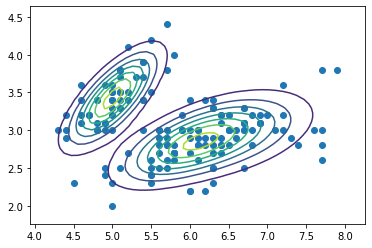

In [18]:
fig, ax =plt.subplots(1,1)
create_gmm_plot(ax, gm_iris, iris_df, [1,2])

In [19]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
fig = slicing_plot_matrix(iris_df)

3it [00:08,  2.88s/it]